## PROJ25: Machine Learning Project of Student Dropout Success dataset

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

from sklearn.metrics import * 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV

In [2]:
import warnings
warnings.filterwarnings("ignore", message='Glyph 9?')

### 1. DATA EXPLORATION (EDA)
<a id="path-change"></a>

In [3]:
# df = pd.read_csv('/Users/nima/Downloads/PROJ25/gruppuppgift/02_dataset/student_dropout_success/data.csv', sep=';')
df = pd.read_csv('./data.csv', sep=';') # Change path to be relative and not dependent on machine

In [4]:
# Info about the dataset
df.info

<bound method DataFrame.info of       Marital status  Application mode  Application order  Course  \
0                  1                17                  5     171   
1                  1                15                  1    9254   
2                  1                 1                  5    9070   
3                  1                17                  2    9773   
4                  2                39                  1    8014   
...              ...               ...                ...     ...   
4419               1                 1                  6    9773   
4420               1                 1                  2    9773   
4421               1                 1                  1    9500   
4422               1                 1                  1    9147   
4423               1                10                  1    9773   

      Daytime/evening attendance\t  Previous qualification  \
0                                1                       1   
1              

In [5]:
# Showing all the features in the dataset
print(df.keys())

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [6]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
# Number of rows and columns in the dataset
df.shape

(4424, 37)

In [8]:
# Datatypes in the dataset
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [9]:
# Checking for missing values
pd.isnull(df).sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [10]:
# Checking unique values in the Target attribute and the distribution of the unique values
target_types = Counter(df['Target'])
print(df['Target'].unique())
print(target_types)

['Dropout' 'Graduate' 'Enrolled']
Counter({'Graduate': 2209, 'Dropout': 1421, 'Enrolled': 794})


### 2. DATA PREPROCESSING

In [11]:
# Creating dataset without 'Enrolled'
df2 = df.copy(deep=True)
df2 = df2[df2.Target != 'Enrolled']
target_types2 = Counter(df2['Target'])
print(df2['Target'].unique())
print(target_types2)

['Dropout' 'Graduate']
Counter({'Graduate': 2209, 'Dropout': 1421})


In [12]:
# Shape of the dataset after 'Enrolled' has been dropped
df2.shape

(3630, 37)

In [13]:
# Transforming Target to numerical values, Dropout=0, Enrolled=1, Graduate=2
dft = df2.copy(deep=True)
le = LabelEncoder()
label = le.fit_transform(dft['Target'])
dft.drop("Target", axis=1, inplace=True)
dft["Target"] = label

In [14]:
# Correlation between the target and the features in the dataset, displaying top 15.
pd.DataFrame(dft.corr()[dft.columns[-1:]]).sort_values(by=['Target'], ascending=False).head(15)

,Target
Target,1.000000
Curricular units 2nd sem (approved),0.653995
Curricular units 2nd sem (grade),0.605350
Curricular units 1st sem (approved),0.554881
Curricular units 1st sem (grade),0.519927
Tuition fees up to date,0.442138
Scholarship holder,0.313018
Curricular units 2nd sem (enrolled),0.182897
Curricular units 1st sem (enrolled),0.161074
Admission grade,0.128058


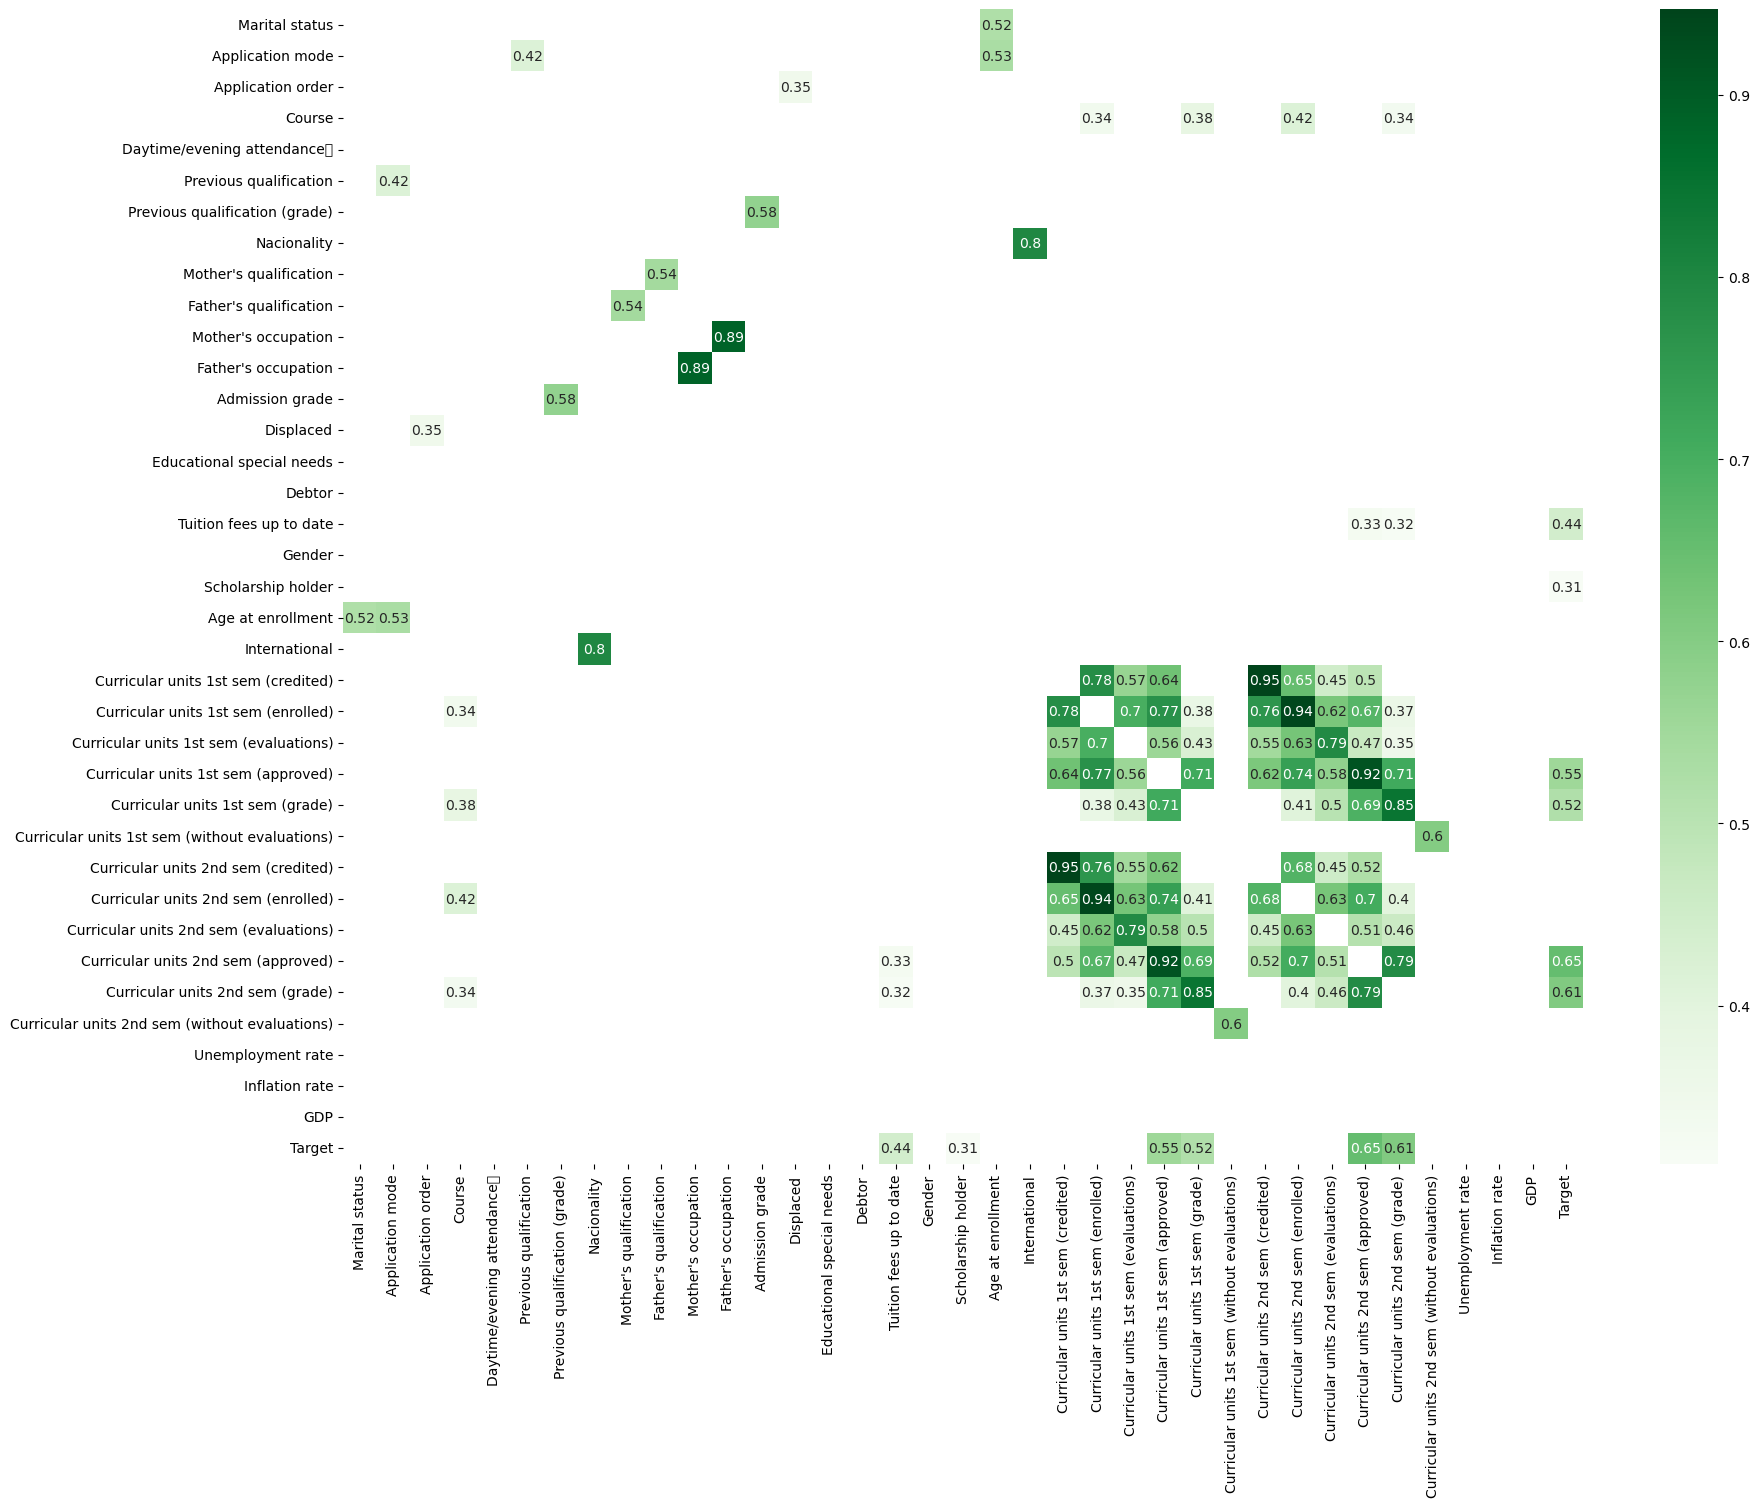

In [15]:
# Correlation Matrix over the dataset
cmatrix = dft.corr()
plt.figure(figsize=(20,15))
sns.heatmap(cmatrix[((cmatrix >= .3) | (cmatrix <= -.6)) & (cmatrix !=1.000)], annot=True, cmap="Greens")
plt.show()

In [16]:
# Creating X, dataset without labels
X = dft.drop(['Target'], axis=1)

In [17]:
# Creating y, the label dataset
y = dft['Target']

In [18]:
# Splitting the data into a training, test and validation dataset
X_train, X_te_va, y_train, y_te_va = train_test_split(X, y, test_size = 0.3, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_te_va, y_te_va, test_size = 0.5, stratify=y_te_va)

In [19]:
# Checking the distribution in the split datasets
print(y_train.count()/y.count())
print(y_test.count()/y.count())
print(y_val.count()/y.count())
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))
print(np.unique(y_val, return_counts=True))

0.7
0.14986225895316804
0.15013774104683195
(array([0, 1]), array([ 995, 1546]))
(array([0, 1]), array([213, 331]))
(array([0, 1]), array([213, 332]))


In [20]:
# Scaling the data with StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train.astype(np.float64))
X_test_scaled = StandardScaler().fit_transform(X_test.astype(np.float64))

In [21]:
# OBS!!! fixa en dataframe för alla dessa värden
print('X_train(max):', np.max(X_train))
print('X_train(min):', np.min(X_train))
print('X_train_scaled(max):', round(np.max(X_train_scaled), 3))
print('X_train_scaled(min):', round(np.min(X_train_scaled), 3))
print('X_train(mean):', round(np.mean(X_train), 3))
print('X_train_scaled(mean):', round(np.mean(X_train_scaled), 3))
print('X_train(std):', round(np.std(X_train), 3))
print('X_train_scaled(std):', round(np.std(X_train_scaled), 3))

X_train(max): Marital status                                       6.000000
Application mode                                    53.000000
Application order                                    6.000000
Course                                            9991.000000
Daytime/evening attendance\t                         1.000000
Previous qualification                              43.000000
Previous qualification (grade)                     190.000000
Nacionality                                        109.000000
Mother's qualification                              43.000000
Father's qualification                              43.000000
Mother's occupation                                194.000000
Father's occupation                                195.000000
Admission grade                                    190.000000
Displaced                                            1.000000
Educational special needs                            1.000000
Debtor                                               1.0

/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/nima/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


### 3. MODEL DEVELOPMENT

- Training Models
- Choosing Models
- K-fold Cross Validation
- Hyperparameter Tuning
- Ensemble method

15 different models was trained on the dataset. Out of these the five with most potential were chosen for further investigation.

Hyperparameter tuning was performed on these five models, but the outcome did however NOT show any siginificant improvements compared to the models default settings for the hyperparameters. Therefor the choice was made to use the default settings.

A summary was done over the performance of the 5 models, also looking at the confusion matrix for the different models to see the difference in predictions between the models.

After that different combinations of the models were used in an ensemble method, VotingClassifier. The most satisfactory result with VotingClassifier was with Logistic Regression, Random Forest Classifier, Support Vector Classifier and Gradient Boosting Classifier combined together.

This combination was chosen as the final model and will be evaulated with the untouched validation dataset.

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

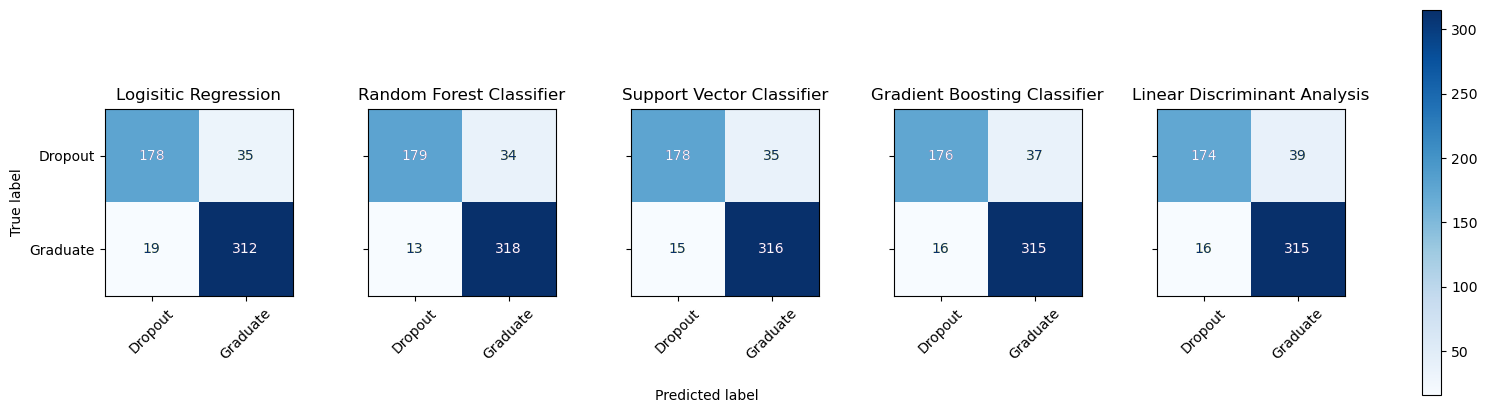

,Train Accuracy,Test Accuracy,Precision,Recall
Logisitic Regression,91.70%,90.07%,90.09%,90.07%
Random Forest Classifier,100.00%,91.36%,91.47%,91.36%
Support Vector Classifier,93.70%,90.81%,90.89%,90.81%
Gradient Boosting Classifier,94.02%,90.26%,90.34%,90.26%
Linear Discriminant Analysis,90.99%,89.89%,90.00%,89.89%


In [23]:
clf = {'Logisitic Regression': LogisticRegression(),
       'Random Forest Classifier': RandomForestClassifier(),
       'Support Vector Classifier': SVC(),
       'Gradient Boosting Classifier': GradientBoostingClassifier(),
       'Linear Discriminant Analysis': LinearDiscriminantAnalysis()}

f, axes = plt.subplots(1, 5, figsize=(20, 5), sharey='row')
target_list = df2['Target'].unique()
result = pd.DataFrame(columns = ['Train Accuracy','Test Accuracy','Precision', 'Recall']) 

for i, (mdl, clf) in enumerate(clf.items()):
    y_pred_test = clf.fit(X_train_scaled, y_train).predict(X_test_scaled)
    y_pred_train = clf.predict(X_train_scaled)
    acctrain = round(accuracy_score(y_train, y_pred_train), 4)
    acctest = round(accuracy_score(y_test, y_pred_test), 4)
    prec = round(precision_score(y_test, y_pred_test, average='weighted'), 4)
    rec = round(recall_score(y_test, y_pred_test, average='weighted'), 4)
    new_row = pd.DataFrame({'Train Accuracy':acctrain, 'Test Accuracy':acctest, 'Precision':prec, 'Recall':rec},
                           index=[mdl])
    result = pd.concat([result, new_row], axis=0)
    cm = ConfusionMatrixDisplay.from_estimator(clf, X_test_scaled, y_test,
                                               display_labels=target_list, ax=axes[i], colorbar=False)
    cm.plot(ax=axes[i], xticks_rotation=45, cmap=plt.cm.Blues,values_format='g')
    cm.ax_.set_title(mdl)
    cm.im_.colorbar.remove()
    cm.ax_.set_xlabel('')
    if i!=0:
        cm.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(cm.im_, ax=axes)
plt.show()

#result.style.background_gradient(cmap=sns.light_palette("blue", as_cmap=True))
display(result.style.format("{:.2%}"))

In [24]:
# OBS!!! Testing K-fold cross validation

In [26]:
from sklearn.ensemble import VotingClassifier

#create our voting classifier
ensemble = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                        ('rf', RandomForestClassifier()),
                                        ('gbc', GradientBoostingClassifier()),
                                        ('svc', SVC())],
                            voting='hard',
                            n_jobs=-1)

#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the test data
acc_tr = ensemble.score(X_train_scaled, y_train)
acc_te = ensemble.score(X_test_scaled, y_test)
sum = pd.DataFrame({'Train Accuracy':[acc_tr], 'Test Accuracy':[acc_te]},
                   index=['Voting Classifier (LR, RF, GBC, SVC)'])
display(sum.style.format("{:.2%}"))

,Train Accuracy,Test Accuracy
"Voting Classifier (LR, RF, GBC, SVC)",94.96%,91.54%


<a id="change-bnb-fit"></a>

### 4. MODEL EVALUATION

lite text.....

In [28]:
# Testing our model on the untouched validation dataset
X_val_scaled = StandardScaler().fit_transform(X_val.astype(np.float64))

from sklearn.ensemble import VotingClassifier

#create our voting classifier
ensemble = VotingClassifier(estimators=[('lr', LogisticRegression()),
                                        ('rf', RandomForestClassifier()),
                                        ('gbc', GradientBoostingClassifier()),
                                        ('svc', SVC())],
                            voting='hard',
                            n_jobs=-1)

#fit model to training data
ensemble.fit(X_train_scaled, y_train)

#test our model on the validation data
acc_val = ensemble.score(X_val_scaled, y_val)
sum = pd.DataFrame({'Validation Accuracy':[acc_val]},
                   index=['Voting Classifier (LR, RF, GBC, SVC)'])
display(sum.style.format("{:.2%}"))

,Validation Accuracy
"Voting Classifier (LR, RF, GBC, SVC)",92.11%


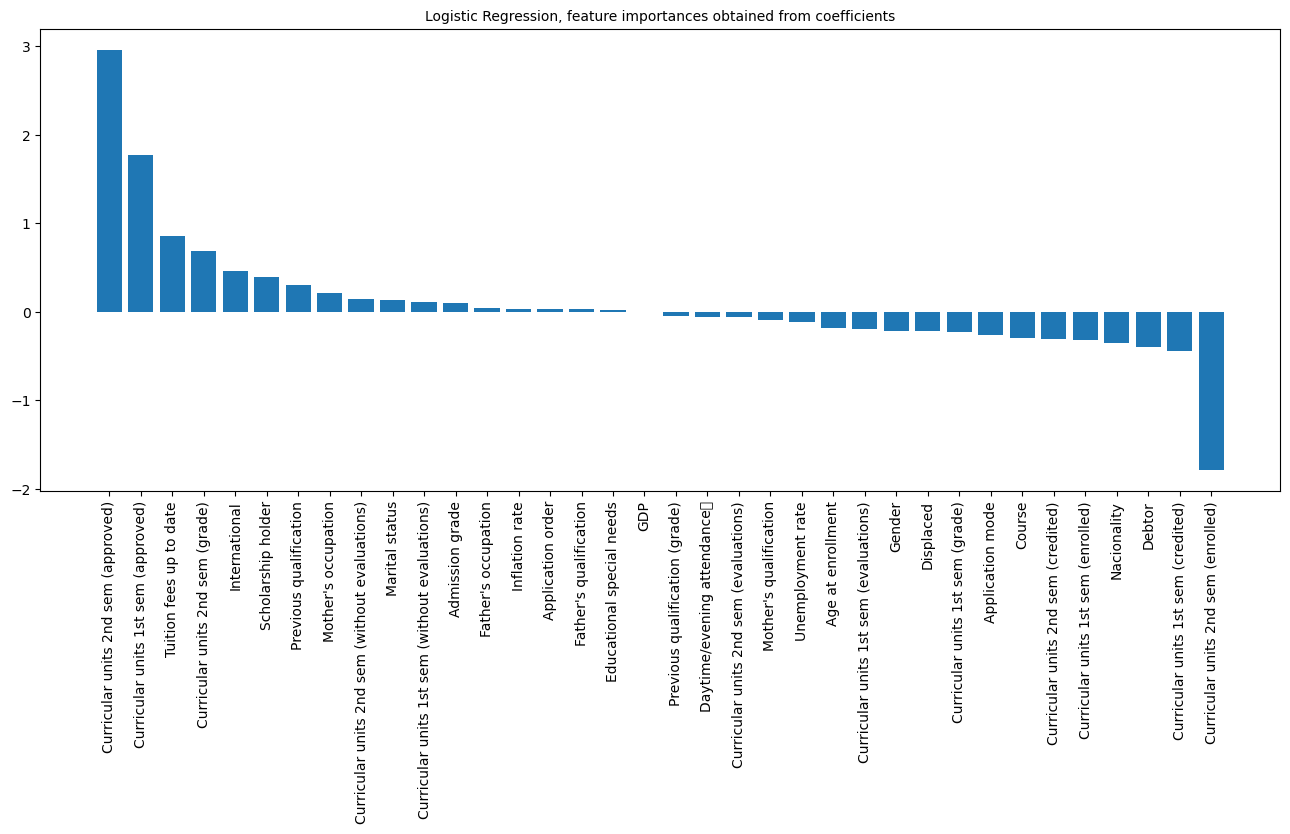

In [31]:
# Looking at the most important features for Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
importance_lr = pd.DataFrame(data={
    'attr': X_train.columns,
    'im_lr': lr.coef_[0]
})
importance_lr = importance_lr.sort_values(by='im_lr', ascending=False)

plt.figure(figsize=(16,6))
plt.bar(x=importance_lr['attr'], height=importance_lr['im_lr'])
plt.title('Logistic Regression, feature importance obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

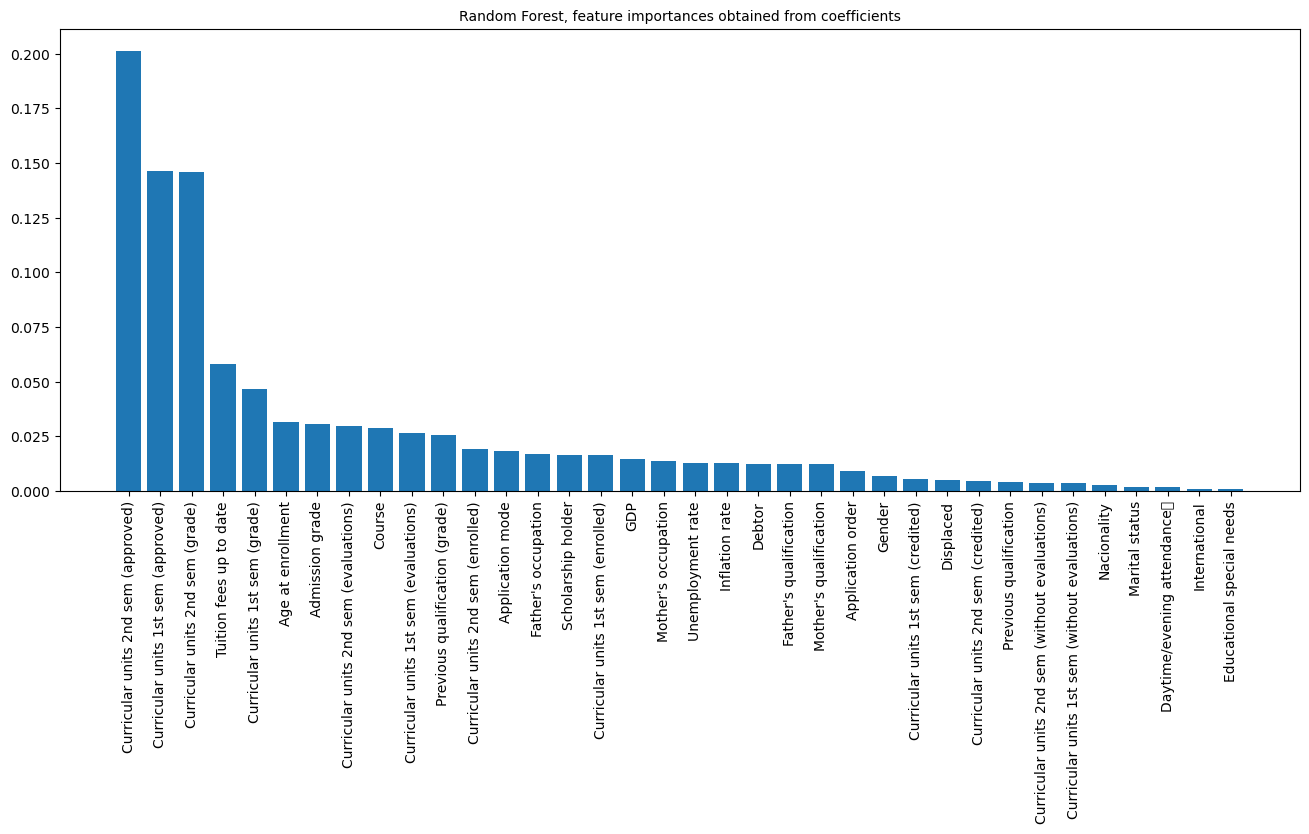

In [32]:
# Looking at the most important features for Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)
importance_rf = pd.DataFrame(data={
    'attr': X_train.columns,
    'im_rf': rf.feature_importances_
})
importance_rf = importance_rf.sort_values(by='im_rf', ascending=False)

plt.figure(figsize=(16,6))
plt.bar(x=importance_rf['attr'], height=importance_rf['im_rf'])
plt.title('Random Forest, feature importance obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Looking at the most important features for Support Vector Classifier

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X, Y)
f_importances(svm.coef_, features_names)

In [ ]:
# Looking at the most important features for Gradient Boosting Classifier


### 5. PROJECT CONCLUSIONS

lite text...

några grafer och tabeller kanske???